In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

cost_revenue_dirty = pd.read_csv("/content/cost_revenue_dirty.csv")
cost_revenue_dirty

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [4]:
#Number of rows and number of columns in the Dataframe
cost_revenue_dirty.shape

(5391, 6)

In [5]:
#Data types of the columns
cost_revenue_dirty.dtypes

,0
Rank,int64
Release_Date,object
Movie_Title,object
USD_Production_Budget,object
USD_Worldwide_Gross,object
USD_Domestic_Gross,object


In [6]:
#Checking if there is any NaN values inside the Dataframe
cost_revenue_dirty.isna().values.any()

np.False_

In [15]:
#Checking if there is duplicates inside the dataframe
cost_revenue_dirty.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5386,False
5387,False
5388,False
5389,False


In [19]:
cost_revenue_dirty["USD_Production_Budget"] = cost_revenue_dirty["USD_Production_Budget"].str.replace("$", "")

In [20]:
cost_revenue_dirty["USD_Production_Budget"] = cost_revenue_dirty["USD_Production_Budget"].str.replace(",", "")

In [22]:
cost_revenue_dirty["USD_Production_Budget"] = pd.to_numeric(cost_revenue_dirty["USD_Production_Budget"], downcast="unsigned")

In [26]:
cost_revenue_dirty["USD_Worldwide_Gross"] = cost_revenue_dirty["USD_Worldwide_Gross"].str.replace("$", "")

In [27]:
cost_revenue_dirty["USD_Worldwide_Gross"] = cost_revenue_dirty["USD_Worldwide_Gross"].str.replace(",", "")

In [30]:
cost_revenue_dirty["USD_Worldwide_Gross"] = pd.to_numeric(cost_revenue_dirty["USD_Worldwide_Gross"], downcast="unsigned")

In [32]:
cost_revenue_dirty["USD_Domestic_Gross"] = cost_revenue_dirty["USD_Domestic_Gross"].str.replace("$", "")

In [33]:
cost_revenue_dirty["USD_Domestic_Gross"] = cost_revenue_dirty["USD_Domestic_Gross"].str.replace(",", "")

In [35]:
cost_revenue_dirty["USD_Domestic_Gross"] = pd.to_numeric(cost_revenue_dirty["USD_Domestic_Gross"], downcast="unsigned")

In [37]:
cost_revenue_dirty["Release_Date"] = pd.to_datetime(cost_revenue_dirty["Release_Date"])

In [45]:
#Average production budget of the films
cost_revenue_dirty["USD_Production_Budget"].mean()

np.float64(31113737.57837136)

In [46]:
#Average worldwide gross revenue of films
cost_revenue_dirty["USD_Worldwide_Gross"].mean()

np.float64(88855421.96271564)

In [48]:
#Minimum for the worldwide revenue
cost_revenue_dirty["USD_Worldwide_Gross"].min()

np.uint32(0)

In [49]:
#Minimum for the domestic revenue
cost_revenue_dirty["USD_Domestic_Gross"].min()

np.uint32(0)

In [84]:
#Highest production budget and highest worldwide gross revenue of any film
cost_revenue_dirty["USD_Production_Budget"].max()

np.uint32(425000000)

In [57]:
cost_revenue_dirty["USD_Worldwide_Gross"].max()

np.uint32(2783918982)

In [66]:
#Highest production budget films revenues
highest_budget_film_revenue = cost_revenue_dirty["USD_Worldwide_Gross"].loc[cost_revenue_dirty["USD_Production_Budget"].idxmax()] + cost_revenue_dirty["USD_Domestic_Gross"].loc[cost_revenue_dirty["USD_Production_Budget"].idxmax()]
highest_budget_film_revenue

np.uint32(3544426607)

In [67]:
#Lowes production budget films revvenues
lowest_budget_film_revenue = cost_revenue_dirty["USD_Worldwide_Gross"].loc[cost_revenue_dirty["USD_Production_Budget"].idxmin()] + cost_revenue_dirty["USD_Domestic_Gross"].loc[cost_revenue_dirty["USD_Production_Budget"].idxmin()]
lowest_budget_film_revenue

np.uint32(362082)

In [72]:
#Number of films that grossed $0 domestically
cost_revenue_dirty.value_counts(cost_revenue_dirty["USD_Domestic_Gross"] == 0)

,count
USD_Domestic_Gross,
False,4879
True,512


In [73]:
#Number of films that grossed $0 worldwide
cost_revenue_dirty.value_counts(cost_revenue_dirty["USD_Worldwide_Gross"] == 0)

,count
USD_Worldwide_Gross,
False,5034
True,357


In [81]:
sub = cost_revenue_dirty[cost_revenue_dirty["USD_Domestic_Gross"] == 0]
sub[sub["USD_Production_Budget"] == sub["USD_Production_Budget"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


In [82]:
sub = cost_revenue_dirty[cost_revenue_dirty["USD_Worldwide_Gross"] == 0]
sub[sub["USD_Production_Budget"] == sub["USD_Production_Budget"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


In [91]:
cost_revenue_dirty.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [97]:
#Films that were not released yet as of the time of data collection
cost_revenue_dirty.query("Release_Date > '2018-05-01'")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [99]:
#Number of films that had no chance to be screened on the box office
cost_revenue_dirty.query("Release_Date > '2018-05-01'").shape[0]

7

In [104]:
data_clean = cost_revenue_dirty.drop([5384, 5385, 5386, 5387, 5388, 5389, 5390])
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [106]:
data_clean.query("USD_Production_Budget > USD_Worldwide_Gross").describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,2007.000000,2007,2.007000e+03,2.007000e+03,2.007000e+03
mean,3200.216243,2005-10-01 04:21:09.955156864,1.945123e+07,9.797640e+06,6.323227e+06
min,6.000000,1916-05-09 00:00:00,1.400000e+03,0.000000e+00,0.000000e+00
25%,1996.500000,2001-07-16 12:00:00,2.300000e+06,2.914150e+04,3.704500e+03
50%,3410.000000,2007-07-09 00:00:00,1.000000e+07,1.638202e+06,5.893080e+05
75%,4521.500000,2012-11-25 12:00:00,2.600000e+07,1.221589e+07,8.366978e+06
max,5390.000000,2017-12-31 00:00:00,2.750000e+08,2.600021e+08,1.002897e+08
std,1465.151198,NaN,2.498288e+07,1.867436e+07,1.105889e+07


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Budget in $100 millions')]

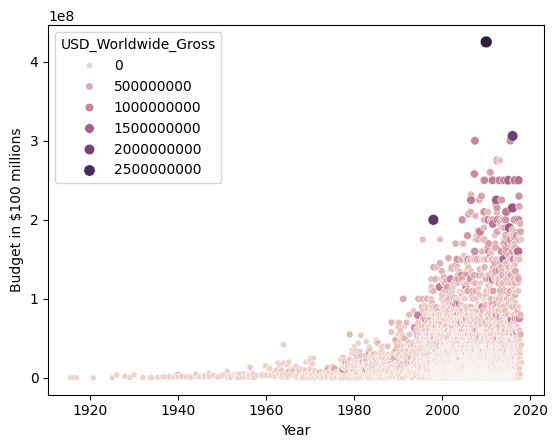

In [111]:
ax = sns.scatterplot(data=data_clean, x="Release_Date", y="USD_Production_Budget", hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
ax.set(xlabel="Year", ylabel="Budget in $100 millions")

In [118]:
data_clean["Decade"] = (data_clean["Release_Date"].dt.year // 10) * 10

In [119]:
old_films = data_clean.query("Decade < 1970")
new_films = data_clean.query("Decade >= 1970")

In [120]:
old_films.shape[0]

153

In [128]:
old_films[old_films["USD_Production_Budget"] == old_films["USD_Production_Budget"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


[Text(0.5, 0, 'Budget in $ millions'), Text(0, 0.5, 'Revenue in $ billions')]

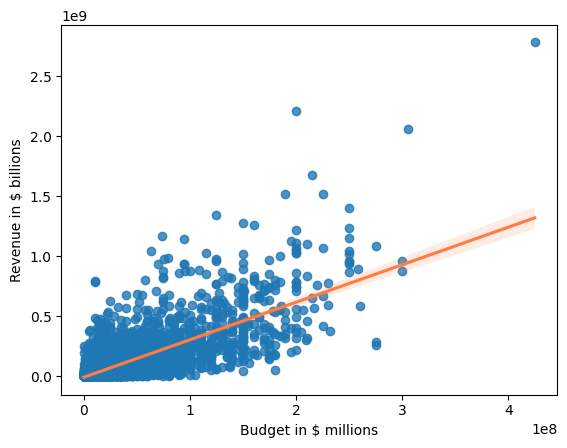

In [129]:
ax = sns.regplot(data=new_films, x="USD_Production_Budget", y="USD_Worldwide_Gross", line_kws={"color": "#ff7c43"})
ax.set(xlabel="Budget in $ millions", ylabel="Revenue in $ billions")

In [145]:
regression = LinearRegression()

X = pd.DataFrame(data=old_films["USD_Production_Budget"].to_numpy())
y = pd.DataFrame(data=old_films["USD_Worldwide_Gross"].to_numpy())

regression.fit(X, y)

slope = regression.coef_
intercept = regression.intercept_
r_squared = regression.score(X, y)
print(slope, intercept, r_squared)

[[1.64771314]] [22821538.63508039] 0.02937258620576877


In [148]:
regression.predict(X)

array([[23002787.08092157],
       [23457402.67134614],
       [23151081.26388253],
       [22986309.94948146],
       [23225228.35536302],
       [29247619.89672224],
       [26116964.92310185],
       [23446021.91666045],
       [29412391.21112331],
       [23740962.56943838],
       [23928801.8678556 ],
       [23151081.26388253],
       [23544884.7053011 ],
       [23357045.40688387],
       [23824995.93978292],
       [25293108.35109648],
       [24963565.72229434],
       [24798794.40789326],
       [25273335.79336835],
       [26116964.92310185],
       [25530379.04383403],
       [25293108.35109648],
       [27397238.03599819],
       [29247619.89672224],
       [26116964.92310185],
       [24943793.16456621],
       [26578324.60342485],
       [24881180.0650938 ],
       [24235276.51264159],
       [23042332.19637782],
       [24533512.59170754],
       [27150081.06439658],
       [26711789.36808972],
       [31389646.98393619],
       [26380599.02614357],
       [24881180.065